## Hierarchical LSTM For Position Estimation

### Load libs

In [1]:
%matplotlib inline
# %pylab osx
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
plt.style.use('ggplot')


### Load data and create database

In [2]:
from Dataset import Train_And_Test_Data
Data=Train_And_Test_Data()
Data.load_data()
Data.min_and_max()
[X_train,Arm_train,y_train,X_test,Arm_test,y_test]=Data.Dataset()

X_train : Train spiking data shape:  (1, 23209, 62)
Arm_train : Train maze labels shape:  (1, 23209, 4)
y_train : train position data shape:  (1, 23209, 4)
X_test : Test spiking data shape:  (1, 4095, 62)
Arm_test : Test maze labels shape:  (1, 4095, 4)
y_test : Test position data shape:  (1, 4095, 4)


### Create Position Estimator with penalized loss

In [3]:
from decoder import Full_Model_LSTMDecoder
Decoder=Full_Model_LSTMDecoder(verbose=0)
Decoder.create_model(X_train,y_train)


Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input (InputLayer)               (None, 23209, 62)     0                                            
____________________________________________________________________________________________________
MazeSeq (LSTM)                   (None, 23209, 4)      1072        Input[0][0]                      
____________________________________________________________________________________________________
VelocitySeq (LSTM)               (None, 23209, 2)      520         Input[0][0]                      
____________________________________________________________________________________________________
ConcatFeature (Concatenate)      (None, 23209, 68)     0           MazeSeq[0][0]                    
                                                                   Input[0][0]             

### Train The Model

Decoder.fit(X_train,y_train,Arm_train)

### Estimate the test path

In [20]:
np.max(y_predict[:,0])

3.5233555659197009

In [22]:
[y_predict,Maze]=Decoder.predict(X_test)


y_predict[:,0]=np.multiply(y_predict[:,0],Data.MaxX-Data.MinX)+Data.MinX
y_predict[:,1]=np.multiply(y_predict[:,1],Data.MaxY-Data.MinY)+Data.MinY
y_predict[:,2]=np.multiply(y_predict[:,2],Data.VMaxX-Data.VMinX)+Data.VMinX
y_predict[:,3]=np.multiply(y_predict[:,3],Data.VMaxY-Data.VMinY)+Data.VMinY



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input (InputLayer)               (None, 4095, 62)      0                                            
____________________________________________________________________________________________________
MazeSeq (LSTM)                   (None, 4095, 4)       1072        Input[0][0]                      
____________________________________________________________________________________________________
VelocitySeq (LSTM)               (None, 4095, 2)       520         Input[0][0]                      
____________________________________________________________________________________________________
ConcatFeature (Concatenate)      (None, 4095, 68)      0           MazeSeq[0][0]                    
                                                                   Input[0][0]             

### Get measures

### RMSE

In [28]:
from metrics import get_RMSE
RMSE=get_RMSE(y_test[0],y_predict)
RMSE

array([ 25.17627267,  50.228737  ,  42.0469577 ,  95.6945503 ])

### R2

In [26]:
from metrics import get_R2
R2=get_RMSE(y_test[0],y_predict)
R2

array([ 25.17627267,  50.228737  ,  42.0469577 ,  95.6945503 ])

### Show the result

Text(0.5,1,'Estimate Velocity Y ')

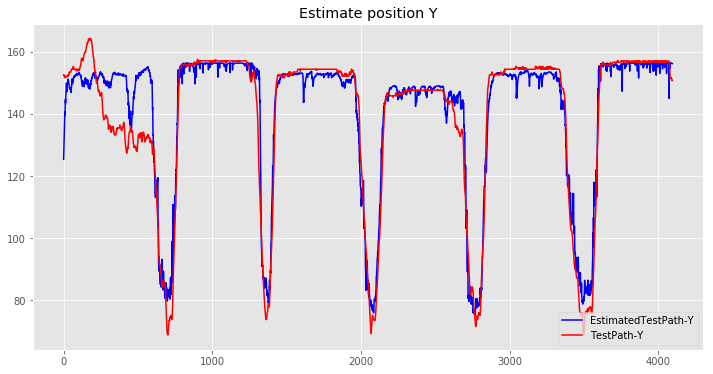

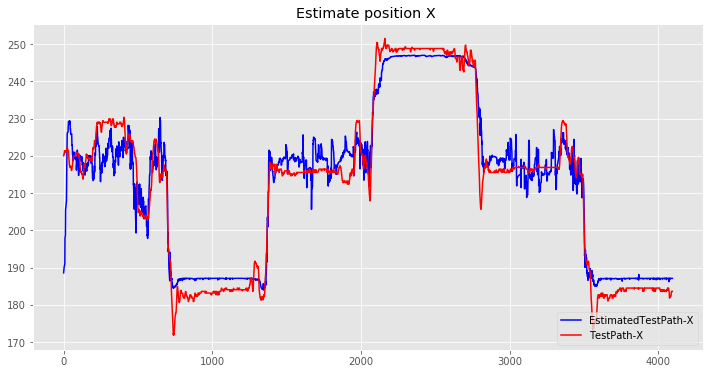

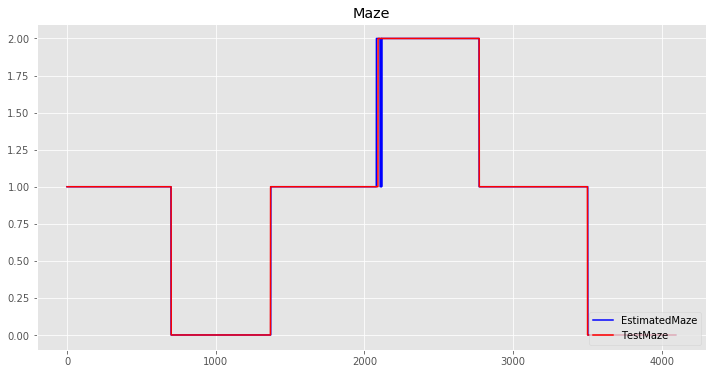

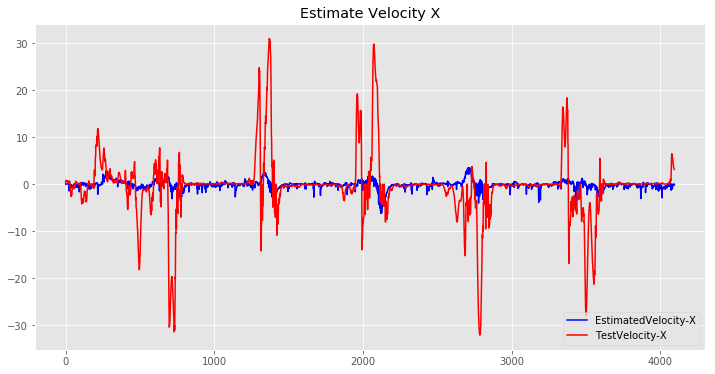

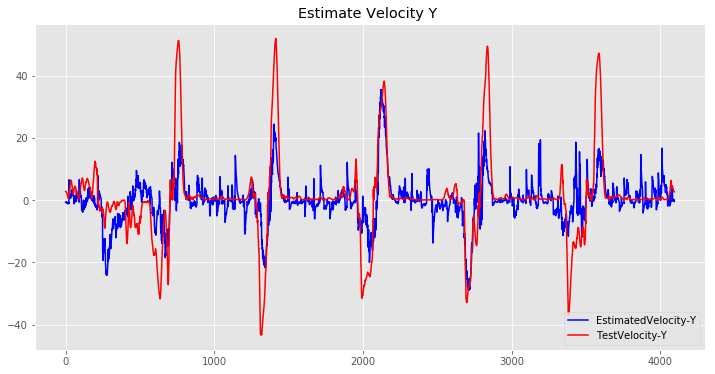

In [25]:
plt.figure(num=None, figsize=(12, 6))
plt1=plt.plot(y_predict[:,1],'b',label="EstimatedTestPath-Y")
plt.plot(y_test[0,:,1],'r',label="TestPath-Y")
plt.legend(loc=4)
plt.title('Estimate position Y')
#plt.savefig('EstimatedTestPath-Y2.png',format='png', dpi=1000,transparent=False)

plt.figure(num=None, figsize=(12, 6))
plt1=plt.plot(y_predict[:,0],'b',label="EstimatedTestPath-X")
plt.plot(y_test[0,:,0],'r',label="TestPath-X")
plt.legend(loc=4)
plt.title('Estimate position X ')
#plt.savefig('EstimatedTestPath-X2.png',format='png', dpi=1000,transparent=False)

plt.figure(num=None, figsize=(12, 6))
plt.plot(np.argmax(Maze[0],axis=-1),'b',label="EstimatedMaze")
plt.plot(np.argmax(Arm_test[0],axis=-1),'r',label="TestMaze")
plt.legend(loc=4)
plt.title('Maze')

#plt.savefig('EstimatedTestPath-X2.png',format='png', dpi=1000,transparent=False)
plt.figure(num=None, figsize=(12, 6))
plt1=plt.plot(y_predict[:,2],'b',label="EstimatedVelocity-X")
plt.plot(y_test[0,:,2],'r',label="TestVelocity-X")
plt.legend(loc=4)
plt.title('Estimate Velocity X')
#
plt.figure(num=None, figsize=(12, 6))
plt1=plt.plot(y_predict[:,3],'b',label="EstimatedVelocity-Y")
plt.plot(y_test[0,:,3],'r',label="TestVelocity-Y")
plt.legend(loc=4)
plt.title('Estimate Velocity Y ')